In [2]:
import matplotlib.pyplot as plt
import cv2

In [3]:
path ='C:/Users/Emirhan/Downloads/CATS_DOGS'

In [4]:
cat4 = cv2.imread(path + '/train/CAT/4.jpg')

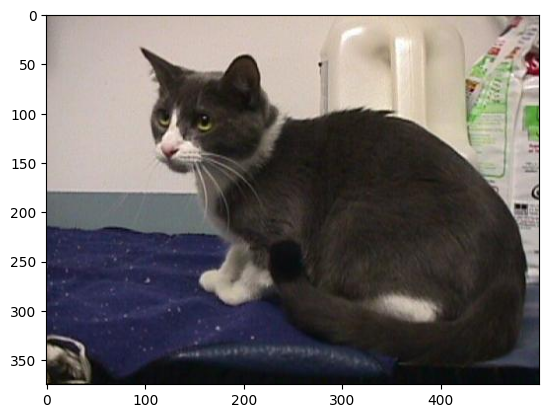

In [5]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

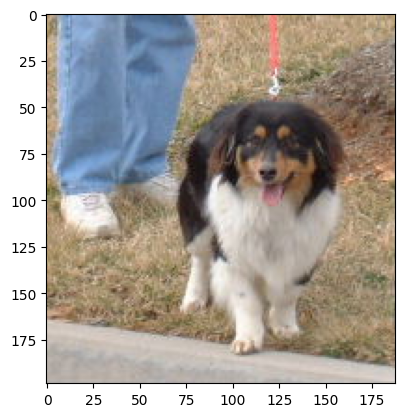

In [6]:
dog2 = cv2.imread(path + '/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)
plt.imshow(dog2)

In [7]:
dog2.shape

(199, 188, 3)

In [8]:
cat4.shape

(375, 500, 3)

## Preparing the Data fot the Model

In [9]:
# IMAGE MANIPULATION

from keras.preprocessing.image import ImageDataGenerator

In [10]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                               )

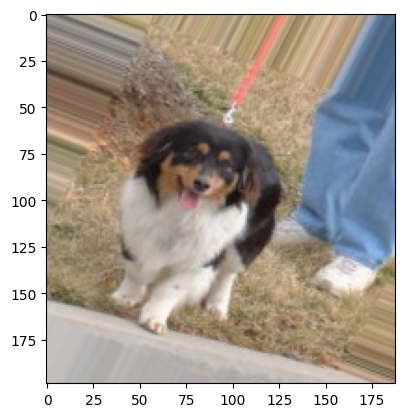

In [11]:
plt.imshow(image_gen.random_transform(dog2))

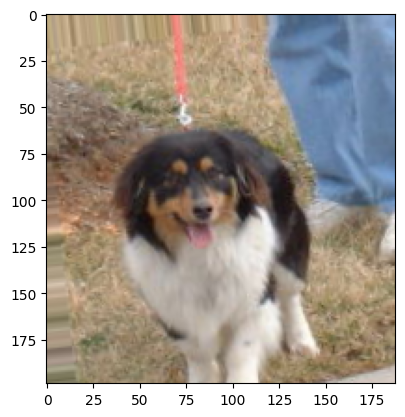

In [12]:
plt.imshow(image_gen.random_transform(dog2))

In [13]:
# GENERATING MANY MANİPULATED IMAGES FROM A DIRECTORY

image_gen.flow_from_directory(path + '/train')

Found 18743 images belonging to 2 classes.


In [14]:
image_gen.flow_from_directory(path + '/test')

Found 6251 images belonging to 2 classes.


In [15]:
# Resizing Images
# height,width,channels

image_shape = (150,150,3)

## Creating the Model

In [16]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [17]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3,),input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3,),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3,),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [20]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory(path + '/train',
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory(path + '/test',
                                                target_size=image_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
#results = model.fit_generator(train_image_gen,epochs=100,
#                              steps_per_epoch=150,
#                              validation_data=test_image_gen,
#                              validation_steps=12)

In [51]:
from keras.models import load_model

In [81]:
new_model = load_model('C:/Users/Emirhan/Desktop/DeepLearning/Computer_Vision_with_OpenCV_and_DeepLearing/Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog.h5')

In [82]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 64)      

In [93]:
dog_file =path + '/test/DOG/9849.jpg'

In [102]:
from keras.preprocessing import image
import numpy as np

In [105]:
dog_img = image.image_utils.load_img(dog_file, target_size=(150, 150))

dog_img = image.image_utils.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [106]:
predictions_prob = model.predict(dog_img)

1/1 [==============================] - 0s 19ms/step


In [107]:
print(predictions_prob) 

[[0.43002713]]


Eğitilmiş model kullanıldı fakat iyi sonuçlar alınamadı.